In [7]:
import numpy as np
import pandas as pd
%matplotlib inline

# Data Cleaning

In [9]:
stock_prices = pd.read_csv('Data/stock_prices_time_series_converged.csv')


In [101]:
nltk_sentiment = pd.read_csv('../sentiment_nltk_13thMay.csv')

In [10]:
print(stock_prices.head())
#stock_prices.drop(columns=['Unnamed: 9','Unnamed: 10'], inplace=True)

  Ticker   timestamp   open   high    low  close     volume  delta  deltaNorm
0   SPWR  23/04/2021  28.07  29.42  27.51  29.01  3461071.0   0.94       0.24
1   SPWR  22/04/2021  27.92  28.98  27.40  27.66  4502055.0  -0.26      -0.04
2   SPWR  21/04/2021  25.60  27.41  25.02  27.38  2589691.0   1.78       0.45
3   SPWR  20/04/2021  26.50  26.90  25.17  25.93  3248555.0  -0.57      -0.12
4   SPWR  19/04/2021  27.45  28.22  26.07  26.54  3803556.0  -0.91      -0.20


In [92]:
#stock_prices.drop(columns=['mean delta', '-0.073169045'], inplace=True)

# Index datetime 

In [11]:
stock_prices

,Ticker,timestamp,open,high,low,close,volume,delta,deltaNorm
0,SPWR,23/04/2021,28.07,29.42,27.51,29.01,3461071.0,0.94,0.24
1,SPWR,22/04/2021,27.92,28.98,27.40,27.66,4502055.0,-0.26,-0.04
2,SPWR,21/04/2021,25.60,27.41,25.02,27.38,2589691.0,1.78,0.45
3,SPWR,20/04/2021,26.50,26.90,25.17,25.93,3248555.0,-0.57,-0.12
4,SPWR,19/04/2021,27.45,28.22,26.07,26.54,3803556.0,-0.91,-0.20
...,...,...,...,...,...,...,...,...,...
32000,VWDRY,19/07/2007,24.00,24.00,24.00,24.00,3763.0,0.00,0.02
32001,VWDRY,18/07/2007,23.25,23.45,23.25,23.25,8735.0,0.00,0.02
32002,VWDRY,17/07/2007,23.40,23.40,23.40,23.40,4464.0,0.00,0.02
32003,VWDRY,16/07/2007,23.55,23.55,23.55,23.55,10016.0,0.00,0.02


In [12]:
stock_prices['Ticker'].unique()

array(['SPWR', 'COENF', 'DNNGY', 'DQ', 'ENPH', 'FSLR', 'GCTAY', 'ORA',
       'RUN', 'SCTY', 'TSLA', 'VWDRY'], dtype=object)

In [13]:
stock_prices.index = pd.to_datetime(stock_prices['timestamp'])

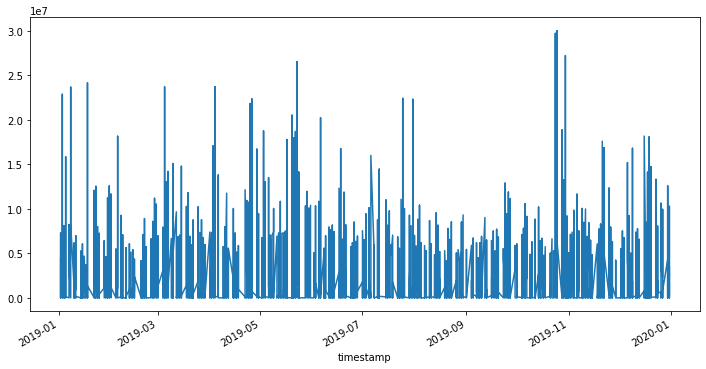

In [14]:
stock_prices['volume']['2019-01-01':'2020-01-01'].plot(figsize=(12,6));

In [15]:
spwr_prices = stock_prices[(stock_prices['Ticker'] == 'SPWR')]
print(spwr_prices )

           Ticker   timestamp   open   high    low  close      volume  delta  \
timestamp                                                                      
2021-04-23   SPWR  23/04/2021  28.07  29.42  27.51  29.01   3461071.0   0.94   
2021-04-22   SPWR  22/04/2021  27.92  28.98  27.40  27.66   4502055.0  -0.26   
2021-04-21   SPWR  21/04/2021  25.60  27.41  25.02  27.38   2589691.0   1.78   
2021-04-20   SPWR  20/04/2021  26.50  26.90  25.17  25.93   3248555.0  -0.57   
2021-04-19   SPWR  19/04/2021  27.45  28.22  26.07  26.54   3803556.0  -0.91   
...           ...         ...    ...    ...    ...    ...         ...    ...   
2005-11-23   SPWR  23/11/2005  25.15  25.58  25.02  25.14    510000.0  -0.01   
2005-11-22   SPWR  22/11/2005  26.73  26.73  25.03  25.10    375900.0  -1.63   
2005-11-21   SPWR  21/11/2005  27.10  27.95  25.75  26.60    571700.0  -0.50   
2005-11-18   SPWR  18/11/2005  25.55  27.51  24.80  27.10   2155300.0   1.55   
2005-11-17   SPWR  17/11/2005  28.00  28

In [16]:
spwr_prices.drop(columns='timestamp', inplace=True)

C:\Users\kamil\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
spwr_prices

,Ticker,open,high,low,close,volume,delta,deltaNorm
timestamp,,,,,,,,
2021-04-23,SPWR,28.07,29.42,27.51,29.01,3461071.0,0.94,0.24
2021-04-22,SPWR,27.92,28.98,27.40,27.66,4502055.0,-0.26,-0.04
2021-04-21,SPWR,25.60,27.41,25.02,27.38,2589691.0,1.78,0.45
2021-04-20,SPWR,26.50,26.90,25.17,25.93,3248555.0,-0.57,-0.12
2021-04-19,SPWR,27.45,28.22,26.07,26.54,3803556.0,-0.91,-0.20
...,...,...,...,...,...,...,...,...
2005-11-23,SPWR,25.15,25.58,25.02,25.14,510000.0,-0.01,0.02
2005-11-22,SPWR,26.73,26.73,25.03,25.10,375900.0,-1.63,-0.37
2005-11-21,SPWR,27.10,27.95,25.75,26.60,571700.0,-0.50,-0.10


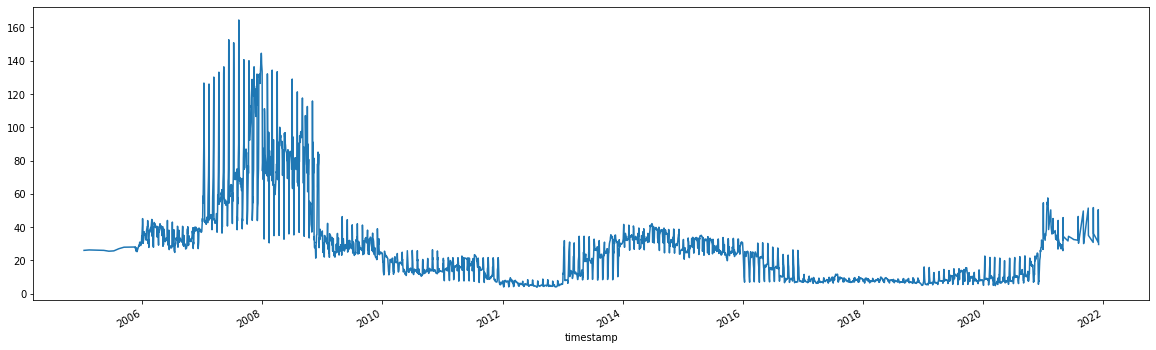

In [19]:
spwr_prices['high'].plot(figsize=(20,6));

<AxesSubplot:xlabel='timestamp'>

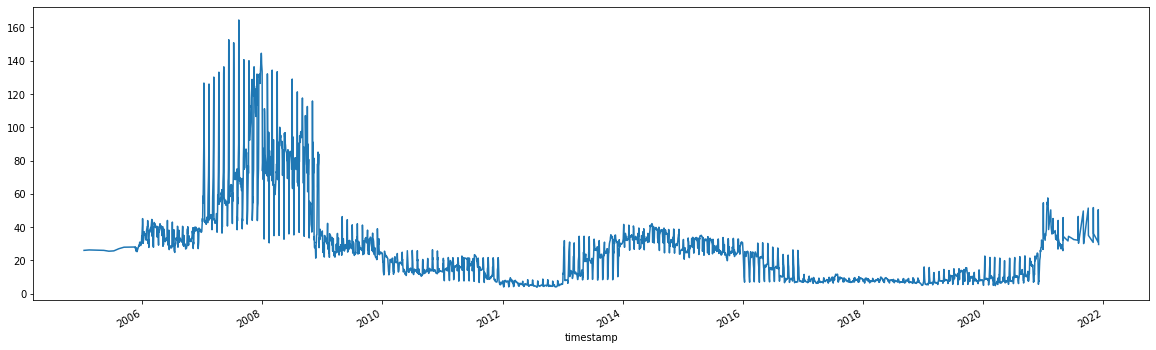

In [20]:
stock_prices[(stock_prices['Ticker'] == 'SPWR')]['high'].plot(figsize=(20,6))

<AxesSubplot:xlabel='timestamp'>

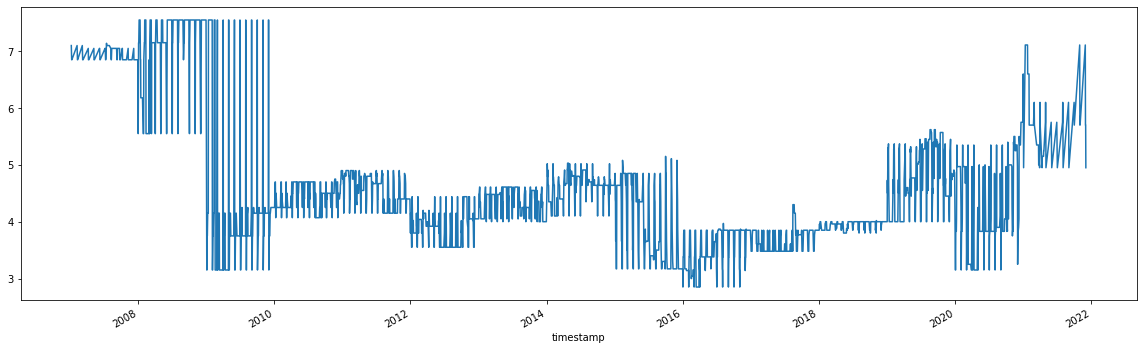

In [21]:
stock_prices[(stock_prices['Ticker'] == 'COENF')]['high'].plot(figsize=(20,6))

<AxesSubplot:xlabel='timestamp'>

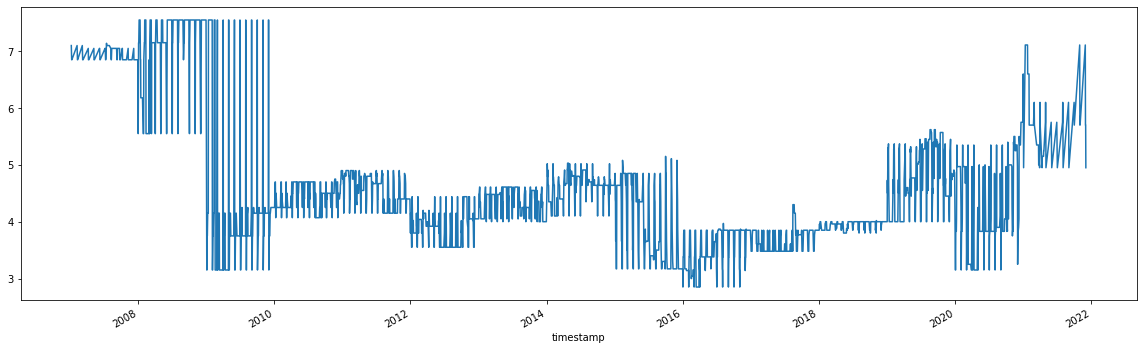

In [22]:
stock_prices[(stock_prices['Ticker'] == 'COENF')]['high'].plot(figsize=(20,6))

In [102]:
stock_prices['Ticker'].unique()

array(['SPWR', 'COENF', 'DNNGY', 'DQ', 'ENPH', 'FSLR', 'GCTAY', 'ORA',
       'RUN', 'SCTY', 'TSLA', 'VWDRY'], dtype=object)

<AxesSubplot:xlabel='timestamp'>

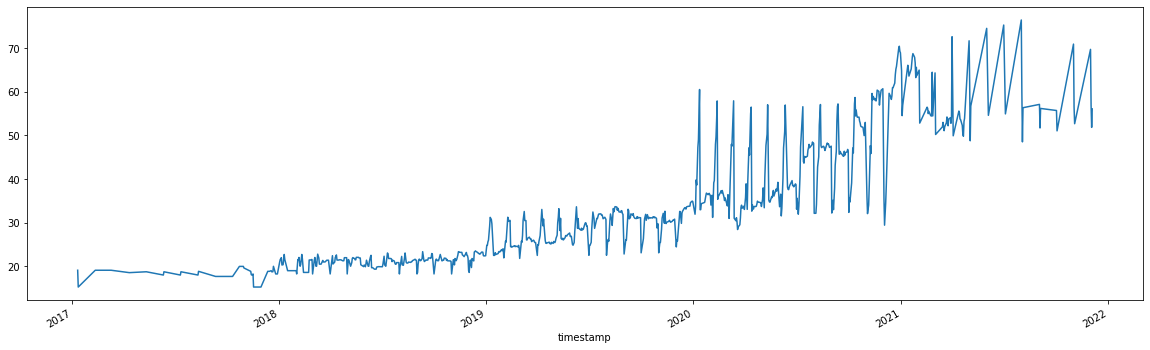

In [23]:
stock_prices[(stock_prices['Ticker'] == 'DNNGY')]['high'].plot(figsize=(20,6))

<AxesSubplot:xlabel='timestamp'>

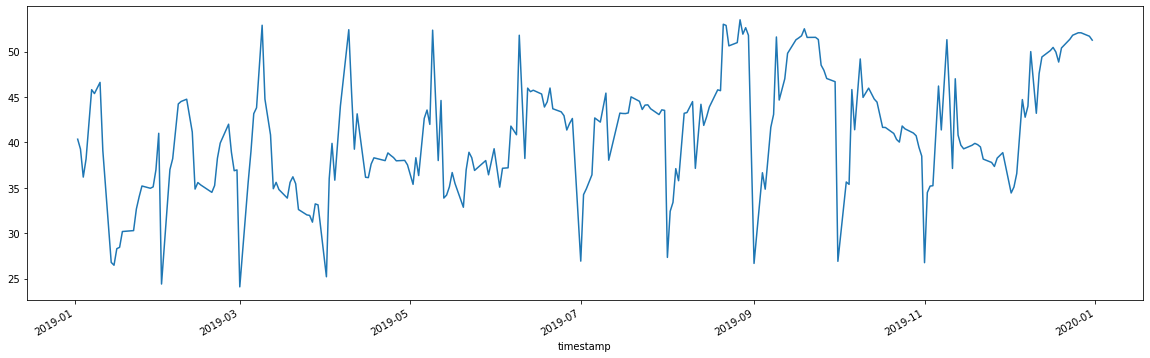

In [24]:
stock_prices[(stock_prices['Ticker'] == 'DQ')]['high']['2019-01-01':'2020-01-01'].plot(figsize=(20,6))
#stock_prices[(stock_prices['Ticker'] == 'DQ')]['volume'].plot(figsize=(12,6))

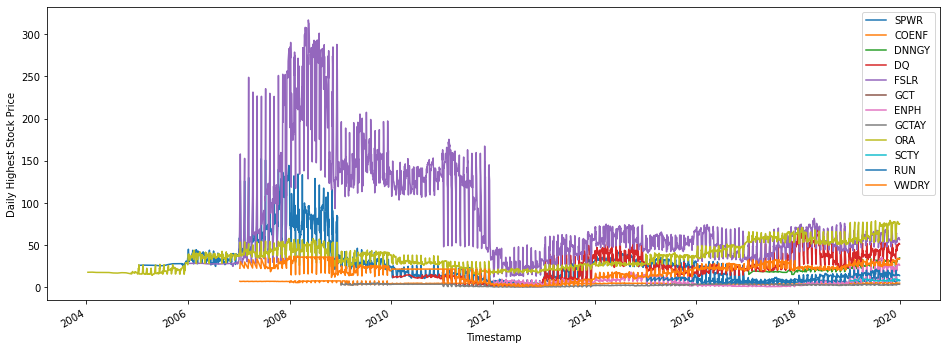

In [25]:
import matplotlib.pyplot as plt
stock_prices[(stock_prices['Ticker'] == 'SPWR')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(20,6), label = "SPWR")
stock_prices[(stock_prices['Ticker'] == 'COENF')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "COENF")
stock_prices[(stock_prices['Ticker'] == 'DNNGY')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "DNNGY")
stock_prices[(stock_prices['Ticker'] == 'DQ')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "DQ")
stock_prices[(stock_prices['Ticker'] == 'FSLR')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "FSLR")
stock_prices[(stock_prices['Ticker'] == 'GCT')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "GCT")
stock_prices[(stock_prices['Ticker'] == 'ENPH')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "ENPH")
stock_prices[(stock_prices['Ticker'] == 'GCTAY')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6), label = "GCTAY")
stock_prices[(stock_prices['Ticker'] == 'ORA')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "ORA")
stock_prices[(stock_prices['Ticker'] == 'SCTY')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "SCTY")
stock_prices[(stock_prices['Ticker'] == 'RUN')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "RUN")
stock_prices[(stock_prices['Ticker'] == 'VWDRY')]['high']['2004-01-01':'2020-01-01'].plot(figsize=(16,6),label = "VWDRY")
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Daily Highest Stock Price')
plt.savefig("../images/stock_prices_all_2001t20.png", format="png")

In [27]:
# Creating Year Week granularity from time stamp - resulting column name = Year-Week
stock_prices['Date'] = pd.to_datetime(stock_prices['timestamp'], errors='coerce')
stock_prices['Year-Week'] = stock_prices['Date'].dt.strftime('%Y-%U')
print(stock_prices.head(3))
print(stock_prices.shape)

           Ticker   timestamp   open   high    low  close     volume  delta  \
timestamp                                                                     
2021-04-23   SPWR  23/04/2021  28.07  29.42  27.51  29.01  3461071.0   0.94   
2021-04-22   SPWR  22/04/2021  27.92  28.98  27.40  27.66  4502055.0  -0.26   
2021-04-21   SPWR  21/04/2021  25.60  27.41  25.02  27.38  2589691.0   1.78   

            deltaNorm       Date Year-Week  
timestamp                                   
2021-04-23       0.24 2021-04-23   2021-16  
2021-04-22      -0.04 2021-04-22   2021-16  
2021-04-21       0.45 2021-04-21   2021-16  
(32005, 11)


In [28]:
stock_prices.head()
stock_prices = stock_prices.sort_values('Date', ascending=True)
stock_prices = stock_prices.sort_index()
stock_prices.head()

# Mean stock values per week granule per company, for overall change the groupby to be only on "Year-Week"
weekly_mean= stock_prices.groupby(['Ticker', 'Year-Week']).mean()

# required to convert grouped index into columns and then reset index on year-week only
weekly_mean.reset_index(inplace=True)  
weekly_mean.head()    
weekly_mean=weekly_mean.set_index('Year-Week')
weekly_mean = weekly_mean.sort_index()
weekly_mean.head()  

,Ticker,open,high,low,close,volume,delta,deltaNorm
Year-Week,,,,,,,,
2004-02,ORA,17.15,17.80,17.06,17.75,112500.0,0.60,0.16
2004-06,ORA,17.90,17.92,17.30,17.35,104600.0,-0.55,-0.11
2004-10,ORA,17.50,17.60,17.06,17.30,61000.0,-0.20,-0.03
2004-23,ORA,17.35,17.50,16.62,16.91,113000.0,-0.44,-0.09
2004-28,ORA,16.71,16.95,16.48,16.48,60700.0,-0.23,-0.04


In [121]:
#SP CLosing : Year Week Mean: 2010 to 2021 – all companies
import matplotlib.pyplot as plt
weekly_mean[(weekly_mean['Ticker'] == 'SPWR')]['close']['2010-01':'2021-01'].plot(figsize=(16,6), label = "SPWR")
weekly_mean[(weekly_mean['Ticker'] == 'COENF')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "COENF")
weekly_mean[(weekly_mean['Ticker'] == 'DNNGY')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "DNNGY")
weekly_mean[(weekly_mean['Ticker'] == 'DQ')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "DQ")
weekly_mean[(weekly_mean['Ticker'] == 'FSLR')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "FSLR")
weekly_mean[(weekly_mean['Ticker'] == 'GCT')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "GCT")
weekly_mean[(weekly_mean['Ticker'] == 'ENPH')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "ENPH")
#weekly_mean[(weekly_mean['Ticker'] == 'GCTAY')]['close']['2010-01':'2021-01'].plot(figsize=(16,6), label = "GCTAY")
weekly_mean[(weekly_mean['Ticker'] == 'ORA')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "ORA")
weekly_mean[(weekly_mean['Ticker'] == 'SCTY')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "SCTY")
weekly_mean[(weekly_mean['Ticker'] == 'RUN')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "RUN")
weekly_mean[(weekly_mean['Ticker'] == 'VWDRY')]['close']['2010-01':'2021-01'].plot(figsize=(16,6),label = "VWDRY")
plt.legend( bbox_to_anchor=(0.55, 0., 0.55, 1))
#plt.xticks( list(range(0,len(weekly_mean.index))), weekly_mean.index.values ) # location, labels
#plt.plot( weekly_mean['close'] )
#plt.show()
plt.xlabel('Timestamp')
plt.ylabel('Daily Highest Stock Price')
plt.savefig("../images/stock_prices_all_2010to2021_close_YW_mean.png", format="png")


TypeError: cannot do slice indexing on Int64Index with these indexers [2010-01] of type str

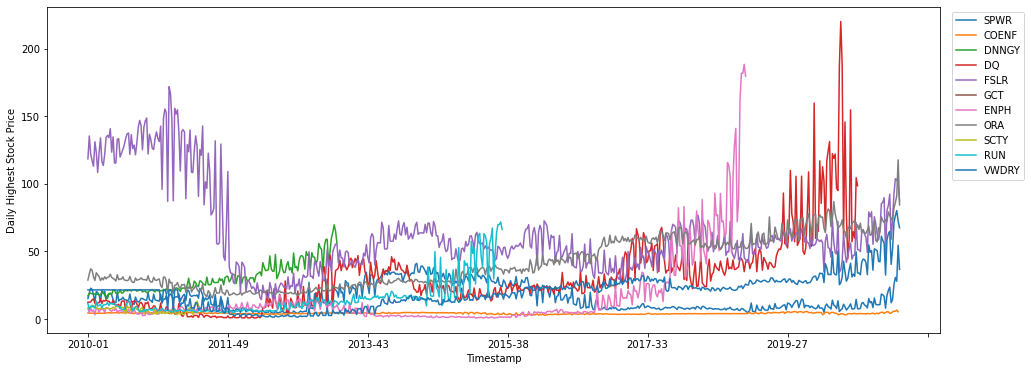

In [45]:
#SP Daily High : Year Week Mean: 2010 to 2021 – all companies
weekly_mean[(weekly_mean['Ticker'] == 'SPWR')]['high']['2010-01':'2021-01'].plot(figsize=(16,6), label = "SPWR")
weekly_mean[(weekly_mean['Ticker'] == 'COENF')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "COENF")
weekly_mean[(weekly_mean['Ticker'] == 'DNNGY')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "DNNGY")
weekly_mean[(weekly_mean['Ticker'] == 'DQ')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "DQ")
weekly_mean[(weekly_mean['Ticker'] == 'FSLR')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "FSLR")
weekly_mean[(weekly_mean['Ticker'] == 'GCT')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "GCT")
weekly_mean[(weekly_mean['Ticker'] == 'ENPH')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "ENPH")
#weekly_mean[(weekly_mean['Ticker'] == 'GCTAY')]['close']['2010-01':'2021-01'].plot(figsize=(16,6), label = "GCTAY")
weekly_mean[(weekly_mean['Ticker'] == 'ORA')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "ORA")
weekly_mean[(weekly_mean['Ticker'] == 'SCTY')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "SCTY")
weekly_mean[(weekly_mean['Ticker'] == 'RUN')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "RUN")
weekly_mean[(weekly_mean['Ticker'] == 'VWDRY')]['high']['2010-01':'2021-01'].plot(figsize=(16,6),label = "VWDRY")
plt.legend( bbox_to_anchor=(0.55, 0., 0.55, 1))
plt.xlabel('Timestamp')
plt.ylabel('Daily Highest Stock Price')
plt.savefig("../images/StockPrices/stock_prices_all_2010t02021_high_YW_mean.png", format="png")


In [95]:
stock_prices['Ticker'].unique()

array(['SPWR', 'COENF', 'DNNGY', 'DQ', 'ENPH', 'FSLR', 'GCTAY', 'ORA',
       'RUN', 'SCTY', 'TSLA', 'VWDRY'], dtype=object)

<AxesSubplot:xlabel='Year-Week'>

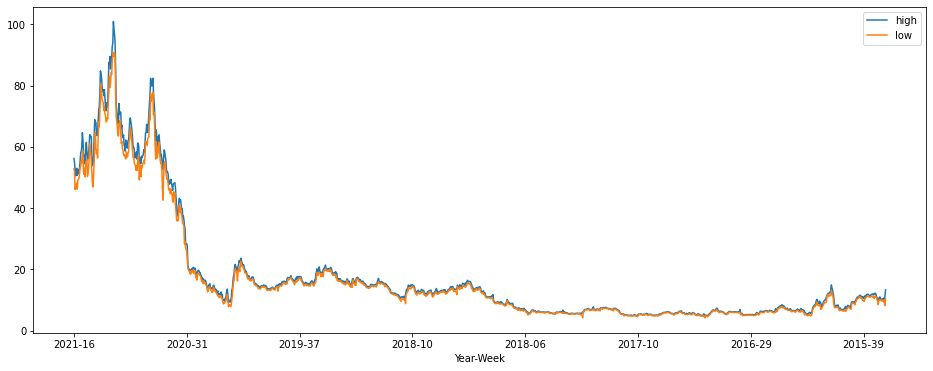

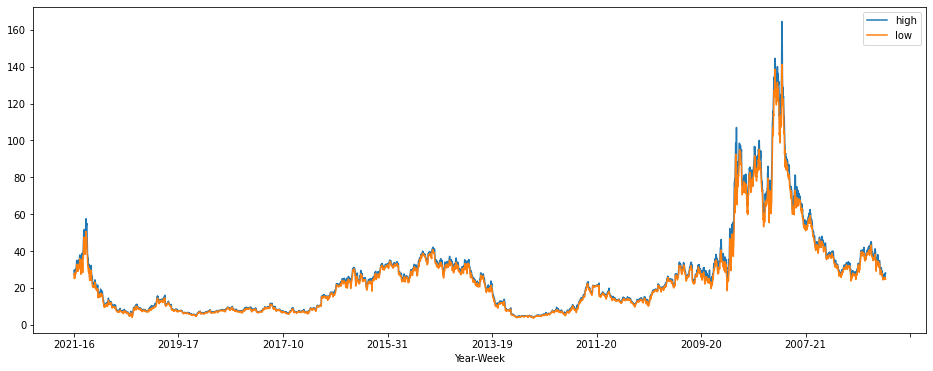

In [131]:
#print(stock_prices)
stock_prices[(stock_prices['Ticker'] == 'RUN')].plot(x="Year-Week", y=["high", "low"], figsize=(16,6), label =[ "high","low"])
stock_prices[(stock_prices['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["high", "low"], figsize=(16,6), label =[ "high","low"])

In [72]:
#nltk_sentiment = pd.read_csv('Data/sentiment_nltk_fixed.csv')
print(nltk_sentiment.head())

     neg    neu    pos  compound                 CreatedAt Ticker
0  0.000  1.000  0.000    0.0000  2021-04-01T00:50:05.000Z   FSLR
1  0.000  0.930  0.070    0.2023  2021-04-01T00:50:05.000Z   FSLR
2  0.081  0.848  0.071   -0.0754  2021-04-01T00:50:05.000Z   FSLR
3  0.000  1.000  0.000    0.0000  2021-04-01T00:50:05.000Z   FSLR
4  0.000  1.000  0.000    0.0000  2021-04-01T00:50:05.000Z   FSLR


In [102]:
#nltk_sentiment.drop(columns=['Unnamed: 0'], inplace=True)result['Final_Date'] = result['CreatedAt'].str[:10]
#nltk_sentiment 
nltk_sentiment['Date'] = pd.to_datetime(nltk_sentiment['CreatedAt'].str[:10], errors='coerce')
nltk_sentiment['Year-Week'] = nltk_sentiment['Date'].dt.strftime('%Y-%U')
print(nltk_sentiment.head(3))
print(nltk_sentiment.shape)

     neg    neu    pos  compound   CreatedAt Ticker       Date Year-Week
0  0.000  1.000  0.000    0.0000  23/04/2021   FSLR 2021-04-23   2021-16
1  0.000  0.930  0.070    0.2023  23/04/2021   FSLR 2021-04-23   2021-16
2  0.081  0.848  0.071   -0.0754  23/04/2021   FSLR 2021-04-23   2021-16
(19218, 8)


In [63]:
#nltk_sentiment['compound'].unique()

  Ticker Year-Week       neg       neu       pos  compound
0   FSLR   2020-16  0.014556  0.917000  0.068444  0.097233
1   FSLR   2021-16  0.004765  0.940941  0.054294  0.148288
2   SPWR   2020-16  0.024136  0.810545  0.165273  0.249636
3   SPWR   2021-16  0.013714  0.865286  0.121000  0.349643
4   TSLA   2020-16  0.021248  0.852960  0.125782  0.197200


Text(0, 0.5, 'Mean Sentiment')

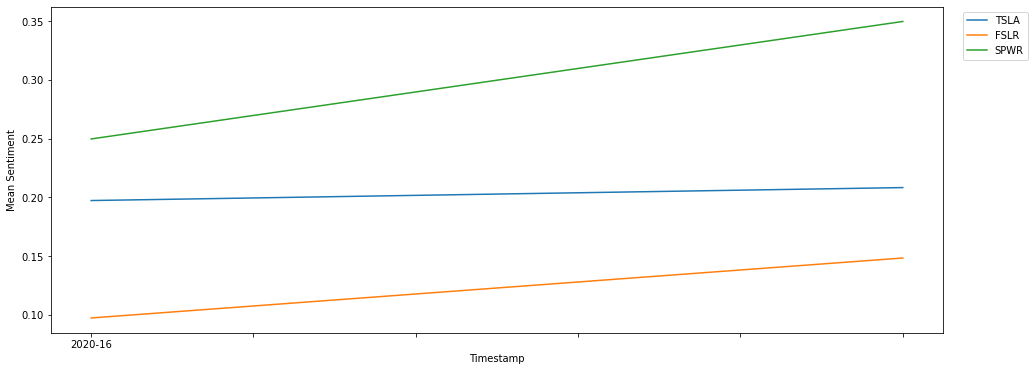

In [90]:
#print(stock_prices)
weekly_mean_sent = nltk_sentiment.groupby(['Ticker', 'Year-Week']).mean()
weekly_mean_sent.reset_index(inplace=True)
print(weekly_mean_sent.head())
weekly_mean_sent=weekly_mean_sent.set_index('Year-Week')

#Plotting compound sentiment for all testing three companies
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'TSLA')]['compound'].plot(figsize=(16,6),label = "TSLA")
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'FSLR')]['compound'].plot(figsize=(16,6),label = "FSLR")
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'SPWR')]['compound'].plot(figsize=(16,6),label = "SPWR")

# fix legend outside main chart
plt.legend( bbox_to_anchor=(0.55, 0., 0.55, 1))


plt.xlabel('Timestamp Yearly-Week')
plt.ylabel('Mean Compound Sentiment')
#plt.savefig("../images/StockPrices/stock_prices_all_2010t21_high_YW_mean.png", format="png")

#nltk_sentiment.plot(x="Year-Week", y=["compound"], figsize=(16,6), label =[ "compound"])

Text(0, 0.5, 'Mean Sentiment')

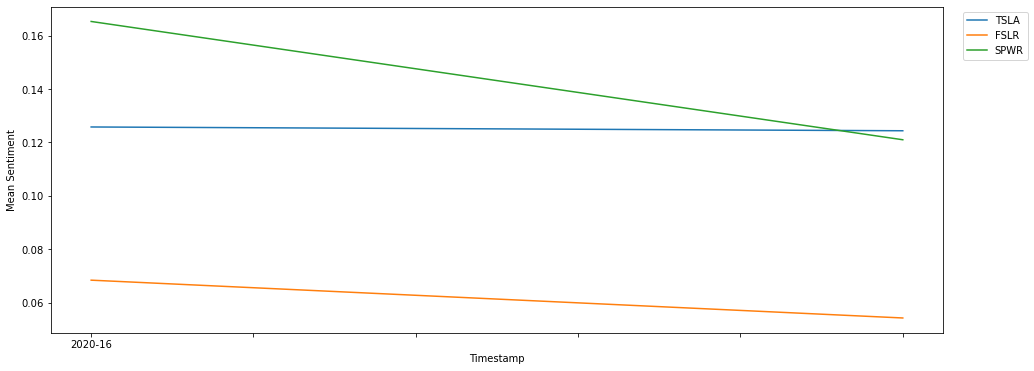

In [91]:
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'TSLA')]['pos'].plot(figsize=(16,6),label = "TSLA")
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'FSLR')]['pos'].plot(figsize=(16,6),label = "FSLR")
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'SPWR')]['pos'].plot(figsize=(16,6),label = "SPWR")
# fix legend outside main chart
plt.legend( bbox_to_anchor=(0.55, 0., 0.55, 1))

plt.xlabel('Timestamp Yearly-Week')
plt.ylabel('Mean Positive Sentiment')

Text(0, 0.5, 'Mean Sentiment')

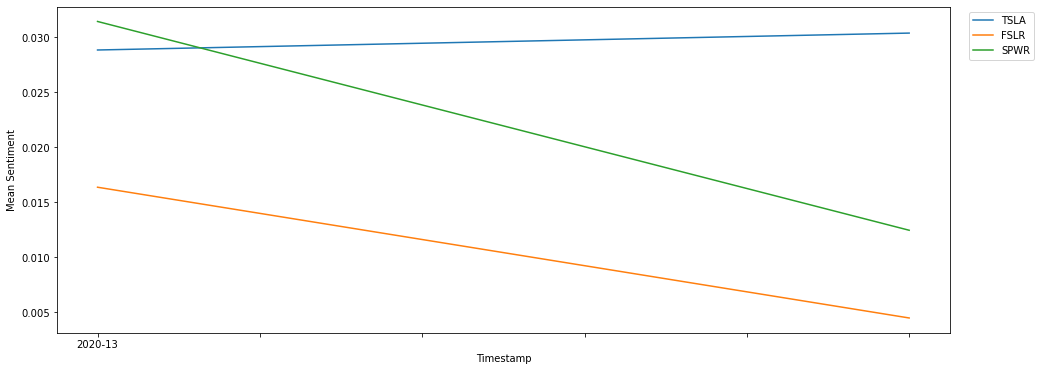

In [84]:
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'TSLA')]['neg'].plot(figsize=(16,6),label = "TSLA")
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'FSLR')]['neg'].plot(figsize=(16,6),label = "FSLR")
weekly_mean_sent[(weekly_mean_sent ['Ticker'] == 'SPWR')]['neg'].plot(figsize=(16,6),label = "SPWR")
# fix legend outside main chart
plt.legend( bbox_to_anchor=(0.55, 0., 0.55, 1))


plt.xlabel('Timestamp Yearly-Week')
plt.ylabel('Mean Negative Sentiment')

In [111]:
# reset index ofr both before joining such that year-week and ticker are both columns in both dataframes
weekly_mean.reset_index(inplace=True)
weekly_mean_sent.reset_index(inplace=True)
print(weekly_mean.head())
print(weekly_mean_sent_m.head())

  Year-Week Ticker   open   high    low  close    volume  delta  deltaNorm
0   2004-02    ORA  17.15  17.80  17.06  17.75  112500.0   0.60       0.16
1   2004-06    ORA  17.90  17.92  17.30  17.35  104600.0  -0.55      -0.11
2   2004-10    ORA  17.50  17.60  17.06  17.30   61000.0  -0.20      -0.03
3   2004-23    ORA  17.35  17.50  16.62  16.91  113000.0  -0.44      -0.09
4   2004-28    ORA  16.71  16.95  16.48  16.48   60700.0  -0.23      -0.04
                  level_0  index       neg       neu       pos  compound
Year-Week Ticker                                                        
2020-16   FSLR          0      0  0.014556  0.917000  0.068444  0.097233
2021-16   FSLR          1      1  0.004765  0.940941  0.054294  0.148288
2020-16   SPWR          2      2  0.024136  0.810545  0.165273  0.249636
2021-16   SPWR          3      3  0.013714  0.865286  0.121000  0.349643
2020-16   TSLA          4      4  0.021248  0.852960  0.125782  0.197200


In [ ]:
#insert code to replace comaoany names in nltk sentiment dataframe to ticker values 

In [116]:
#left join both DF on ticker values and Year-Week 
mergedDf  = pd.merge(weekly_mean_sent, weekly_mean,  how='left', left_on=['Year-Week','Ticker'], right_on = ['Year-Week','Ticker']) # try changing to inner as well 
#print(mergedDf)
#mergedDf.reset_index(inplace=True)
print(mergedDf)
print(mergedDf.shape)

   level_0  index Year-Week Ticker       neg       neu       pos  compound  \
0        0      0   2020-16   FSLR  0.014556  0.917000  0.068444  0.097233   
1        1      1   2021-16   FSLR  0.004765  0.940941  0.054294  0.148288   
2        2      2   2020-16   SPWR  0.024136  0.810545  0.165273  0.249636   
3        3      3   2021-16   SPWR  0.013714  0.865286  0.121000  0.349643   
4        4      4   2020-16   TSLA  0.021248  0.852960  0.125782  0.197200   
5        5      5   2021-16   TSLA  0.030402  0.845227  0.124367  0.208225   

      open     high      low    close      volume  delta  deltaNorm  
0   41.070   41.794   40.064   40.708   1409773.8 -0.362     -0.070  
1   82.964   85.642   81.446   83.786   2873847.6  0.822      0.216  
2    6.480    6.658    6.284    6.470   2274242.4 -0.010      0.014  
3   27.108   28.186   26.234   27.304   3520985.6  0.196      0.066  
4  721.042  743.526  695.204  719.194  15130960.0 -1.848     -0.426  
5  720.618  739.724  706.798  725

<AxesSubplot:xlabel='Year-Week'>

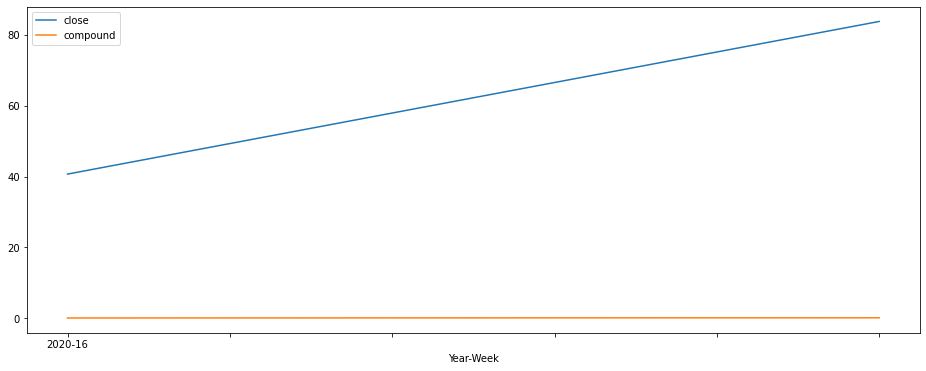

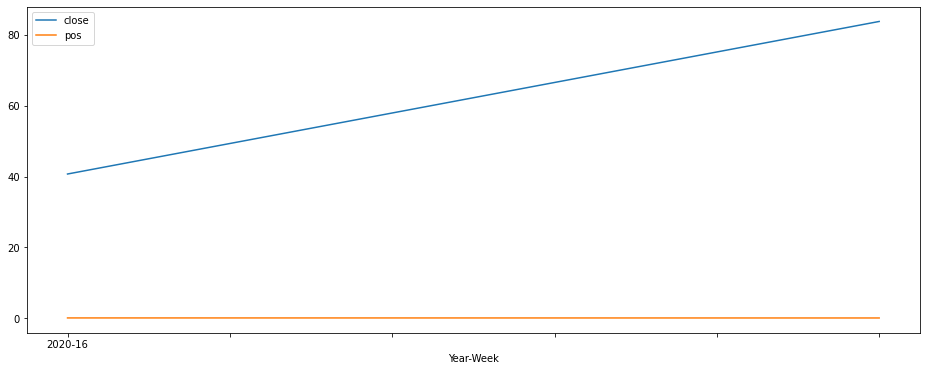

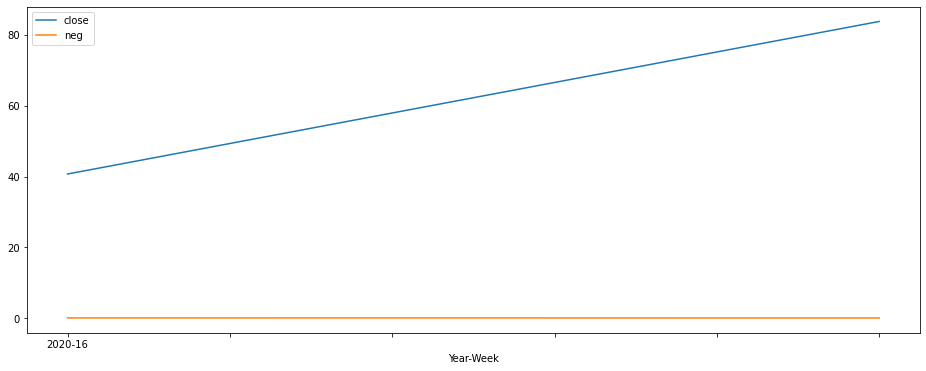

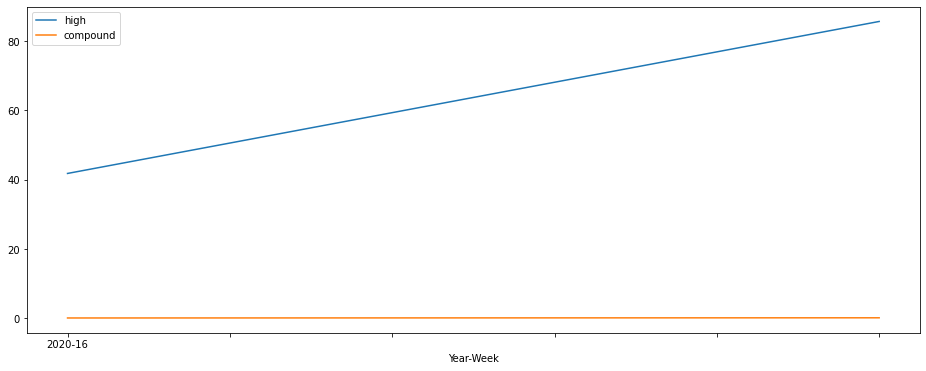

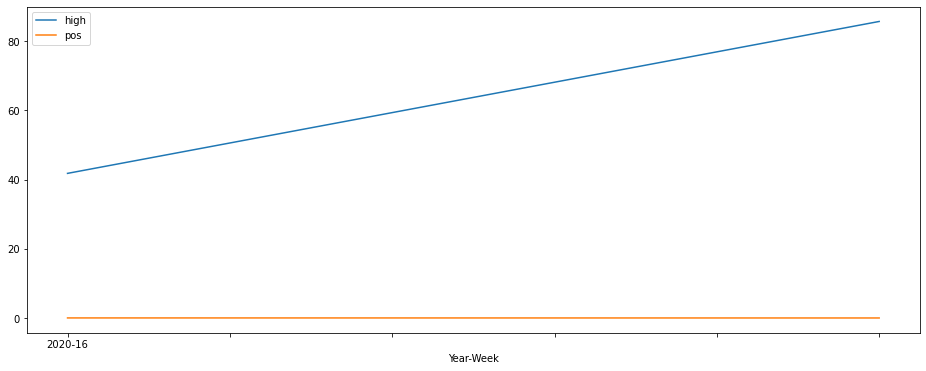

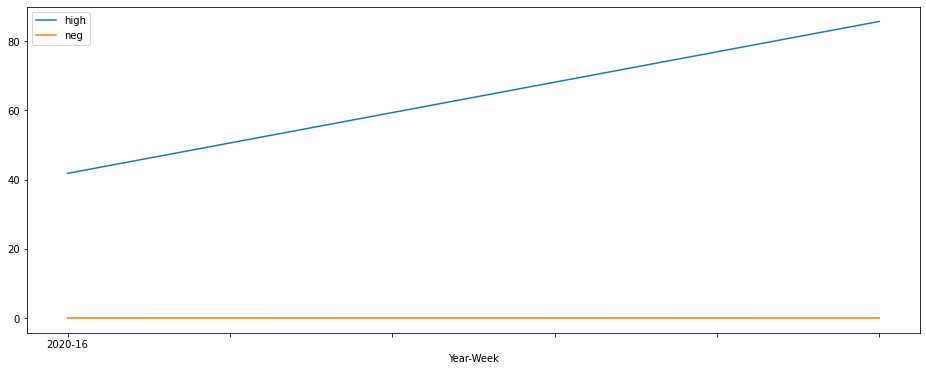

In [117]:
# FSLR : stock Price attribute: closing price Vs Sentiment Values: compound, postive and negative
mergedDf[(mergedDf['Ticker'] == 'FSLR')].plot(x="Year-Week", y=["close", "compound"], figsize=(16,6), label =["close", "compound"])
mergedDf[(mergedDf['Ticker'] == 'FSLR')].plot(x="Year-Week", y=["close", "pos"], figsize=(16,6), label =["close", "pos"])
mergedDf[(mergedDf['Ticker'] == 'FSLR')].plot(x="Year-Week", y=["close", "pos"], figsize=(16,6), label =["close", "neg"])

#stock Price attribute: daily high Vs Sentiment Values: compound, postive and negative
mergedDf[(mergedDf['Ticker'] == 'FSLR')].plot(x="Year-Week", y=["high", "compound"], figsize=(16,6), label =["high", "compound"])
mergedDf[(mergedDf['Ticker'] == 'FSLR')].plot(x="Year-Week", y=["high", "pos"], figsize=(16,6), label =["high", "pos"])
mergedDf[(mergedDf['Ticker'] == 'FSLR')].plot(x="Year-Week", y=["high", "pos"], figsize=(16,6), label =["high", "neg"])

<AxesSubplot:xlabel='Year-Week'>

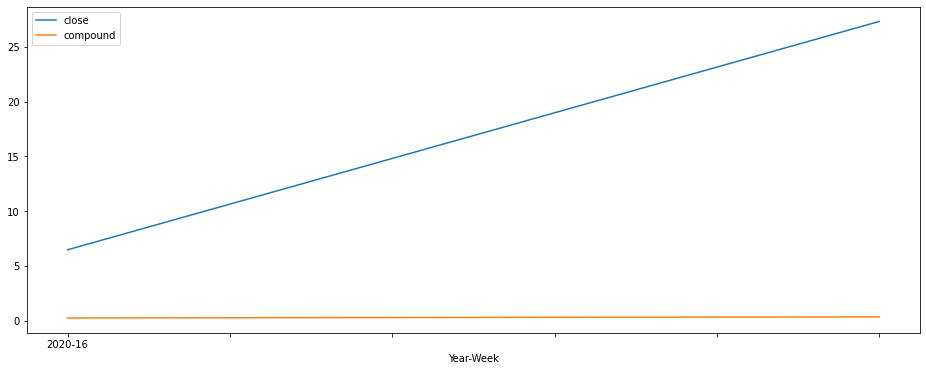

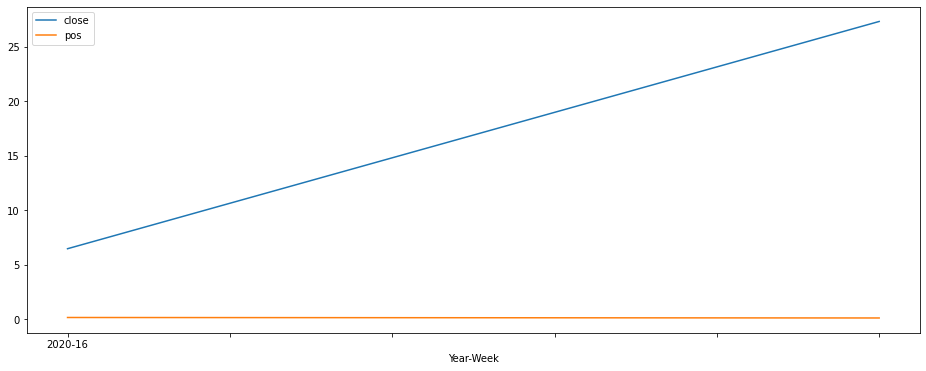

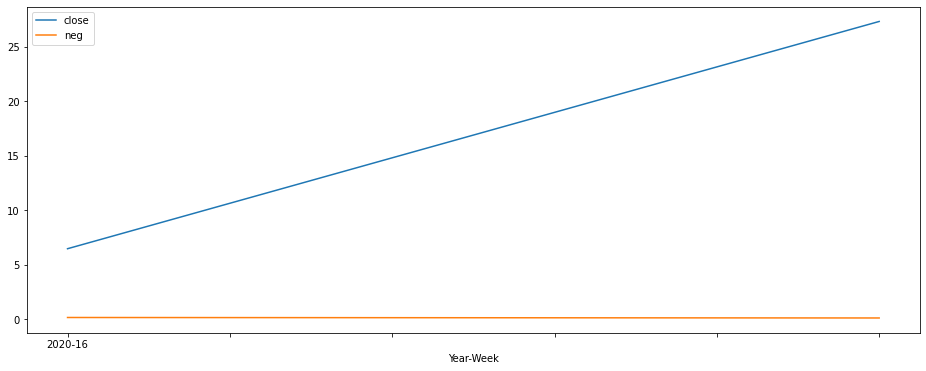

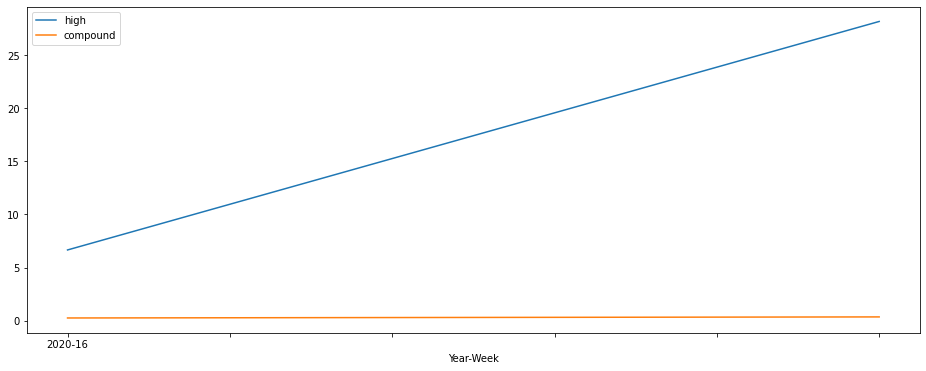

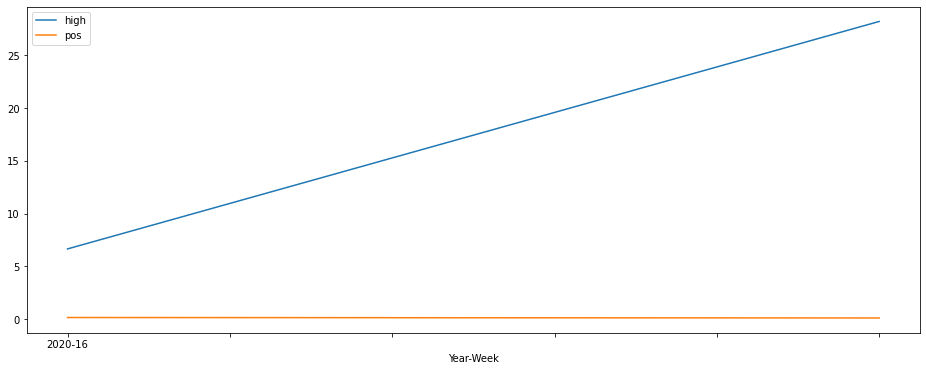

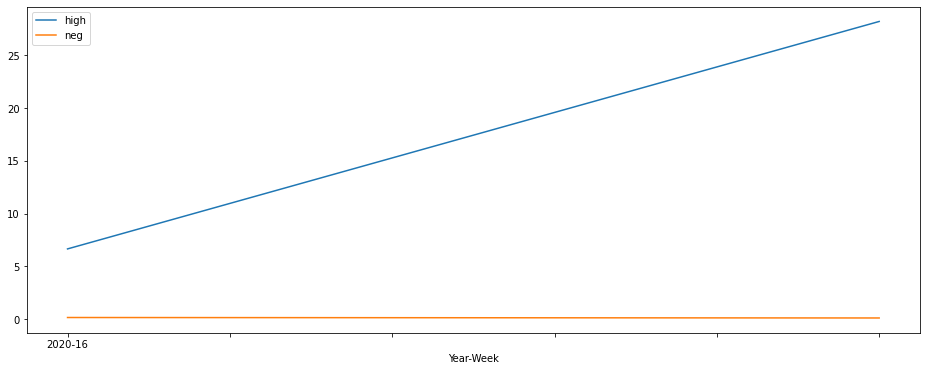

In [118]:
#### SPWR ####
#stock Price attribute: closing price Vs Sentiment Values: compound, postive and negative
mergedDf[(mergedDf['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["close", "compound"], figsize=(16,6), label =["close", "compound"])
mergedDf[(mergedDf['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["close", "pos"], figsize=(16,6), label =["close", "pos"])
mergedDf[(mergedDf['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["close", "pos"], figsize=(16,6), label =["close", "neg"])

#stock Price attribute: daily high Vs Sentiment Values: compound, postive and negative
mergedDf[(mergedDf['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["high", "compound"], figsize=(16,6), label =["high", "compound"])
mergedDf[(mergedDf['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["high", "pos"], figsize=(16,6), label =["high", "pos"])
mergedDf[(mergedDf['Ticker'] == 'SPWR')].plot(x="Year-Week", y=["high", "pos"], figsize=(16,6), label =["high", "neg"])

<AxesSubplot:xlabel='Year-Week'>

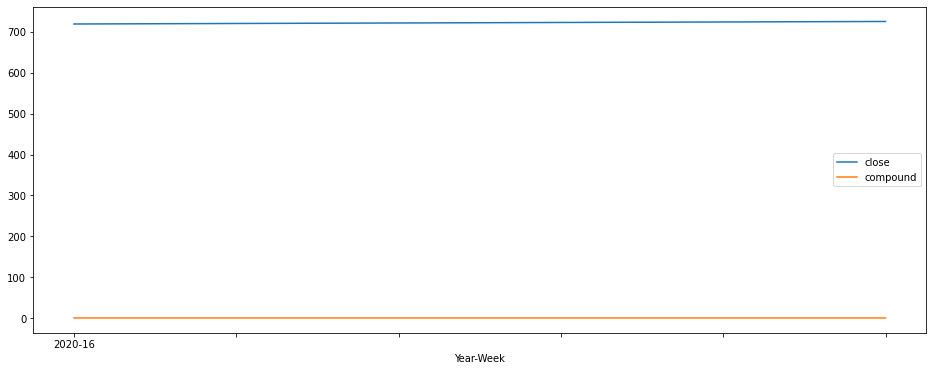

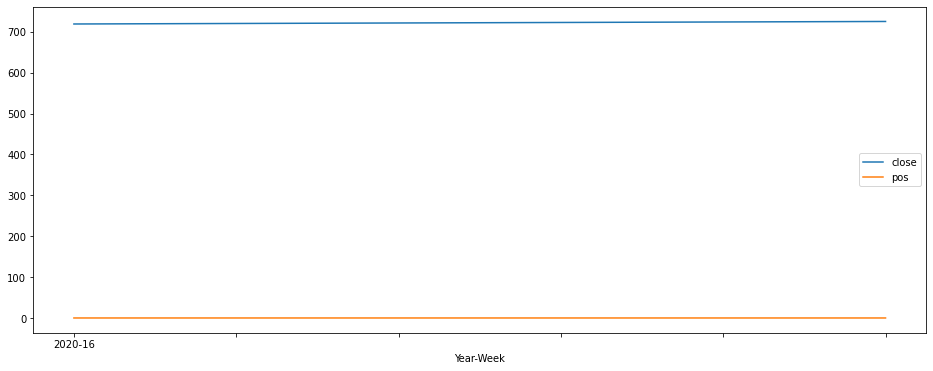

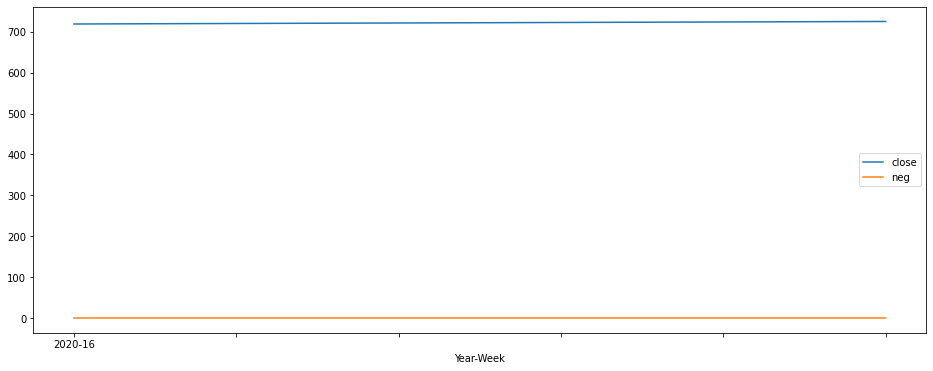

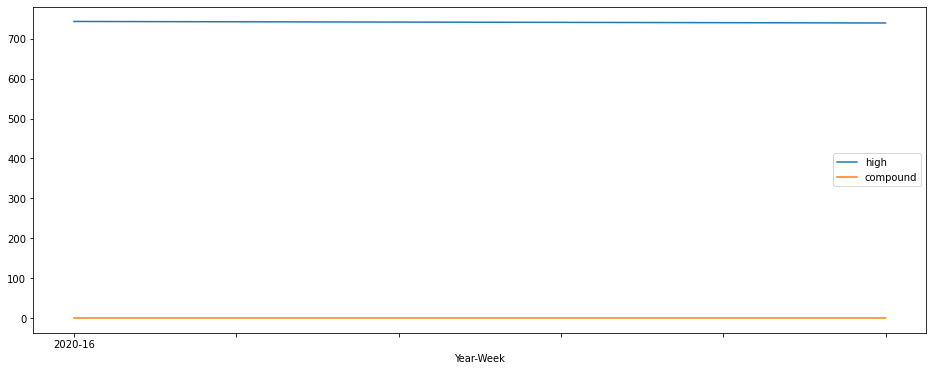

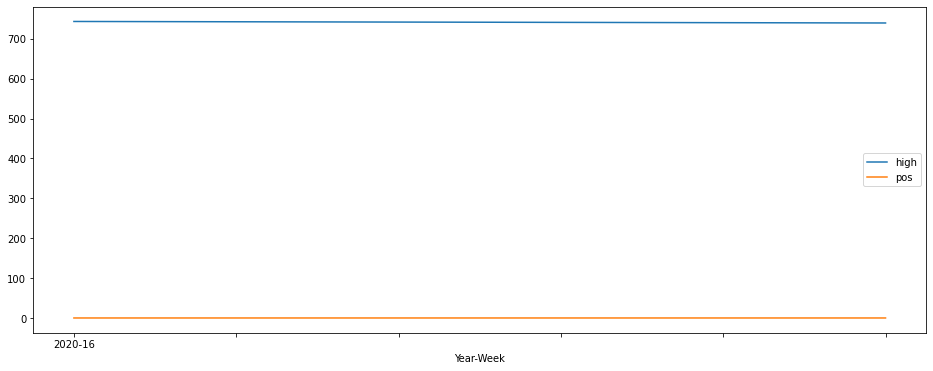

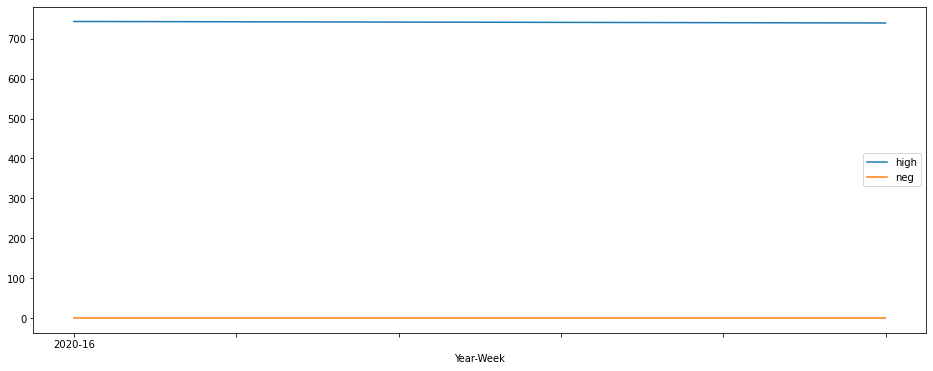

In [119]:
# FSLR : stock Price attribute: closing price Vs Sentiment Values: compound, postive and negative
mergedDf[(mergedDf['Ticker'] == 'TSLA')].plot(x="Year-Week", y=["close", "compound"], figsize=(16,6), label =["close", "compound"])
mergedDf[(mergedDf['Ticker'] ==  'TSLA')].plot(x="Year-Week", y=["close", "pos"], figsize=(16,6), label =["close", "pos"])
mergedDf[(mergedDf['Ticker'] == 'TSLA')].plot(x="Year-Week", y=["close", "pos"], figsize=(16,6), label =["close", "neg"])

#stock Price attribute: daily high Vs Sentiment Values: compound, postive and negative
mergedDf[(mergedDf['Ticker'] == 'TSLA')].plot(x="Year-Week", y=["high", "compound"], figsize=(16,6), label =["high", "compound"])
mergedDf[(mergedDf['Ticker'] == 'TSLA')].plot(x="Year-Week", y=["high", "pos"], figsize=(16,6), label =["high", "pos"])
mergedDf[(mergedDf['Ticker'] == 'TSLA')].plot(x="Year-Week", y=["high", "pos"], figsize=(16,6), label =["high", "neg"])